---
## **Problem Statement**
---
### To understand the behavior and correlation of all the variables against Target varibale **Survived**. 
Note: EDA (Exploratory Data Analysis) steps will be performed to attempt a solution for given problem statement 

---

### **EDA steps to be accomplished**

---

1. Reading and Understanding Data
  - Checking for Incorrect Datatypes, Missing values and Null values
  - Checking Outliers and Invalid values
2. Data Visualization
  - Comparing Survived against different variables
    - Survived Vs Pclass
    - Survived Vs Sex
    - Survived Vs Age
      - Survived Vs Age_Bins
    - Survived Vs SibSp
    - Survived Vs Parch
    - Survived Vs Embarked
3. Data Preparation
  - Dropping Irrelevant variables
  - Convert Categorical variable to Ordinal variables
  - Visualize Correlation between all variables
4. Using Machine Learning Algorithm
  - Logistic Regression
  - K Nearest Neighbors
  - Decision Tree

In [1]:
# Loading Dataset

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv

/kaggle/input/titanic/test.csv


In [2]:
# command to ignore warnings during filtering
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning library
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation metrics library
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

# commands to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Step 1: **Reading and Understanding Data**

In [3]:
# reading unlabelled data
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# moving target column to the last
df = df.reindex(columns = [col for col in df.columns if col != 'Survived'] + ['Survived'])

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
# checking no. of rows and columns
df.shape

(891, 12)

#### Observations:
- There are 891 rows and 11 columns with 1 target column making total 12 columns

### 1.1 Checking for **Incorrect Datatypes, Missing values and Null values**

In [5]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Pclass       891 non-null    int64  

 2   Name         891 non-null    object 

 3   Sex          891 non-null    object 

 4   Age          714 non-null    float64

 5   SibSp        891 non-null    int64  

 6   Parch        891 non-null    int64  

 7   Ticket       891 non-null    object 

 8   Fare         891 non-null    float64

 9   Cabin        204 non-null    object 

 10  Embarked     889 non-null    object 

 11  Survived     891 non-null    int64  

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


#### Observations:
- `Age` datatype needs to be changed to int but before let's check for the null values in it, as null values could through error while changing datatypes
- Datatype for `Age` column needs to be changed as age in never in fractional form.
- Columns like `Cabin, Age` have huge number of missing values which needs to be treated before proceedings.
- Even `Embarked` is having null values which can be imputed.

In [6]:
# counting null/na values in the columns
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
# calculating percentage of missing values
((df.isna()|df.isnull()).sum() * 100 / len(df)).round(2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
Survived        0.00
dtype: float64

#### Observations:
##### If a column has missing value percentage more than 50% than those columns should not be dropped as it could significantly affect the final outcome.
1. The percentage of `Age` column with missing values is 19.87% which can be dropped.
2. `Cabin` column has higher number of missing value i.e. 77.10%, hence, these can't be dropped but could be imputed using mode (selecting most frequent value).
3. Similarly, `Embarked` column could be imputed using mode.

In [8]:
# 1. Dropping missing values in 'Age' column
df=df[df['Age'].notnull()]

# Cross-checking the changes
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
Survived         0
dtype: int64

In [9]:
# Age data type should be int
# Changing datatype of Age column to 'int' type
df['Age'] = df['Age'].astype('int64')

# confirming changes
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [10]:
# 2. & 3. Imputing null values with most frequent values in Cabin and Embarked coulmns using mode()
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

# conforming changes
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

### 1.2 Checking **Outliers and Invalid values**

In [11]:
# describing dataset
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,2.236695,29.679272,0.512605,0.431373,34.694514,0.406162
std,259.119524,0.838250,14.536483,0.929783,0.853289,52.918930,0.491460
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


#### Observations:
* There seems to be have no outliers and invalid values in the data.

# Step 2: Data Visualization

In [12]:
# Data obersvation
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,0


In [13]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 714 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  714 non-null    int64  

 1   Pclass       714 non-null    int64  

 2   Name         714 non-null    object 

 3   Sex          714 non-null    object 

 4   Age          714 non-null    int64  

 5   SibSp        714 non-null    int64  

 6   Parch        714 non-null    int64  

 7   Ticket       714 non-null    object 

 8   Fare         714 non-null    float64

 9   Cabin        714 non-null    object 

 10  Embarked     714 non-null    object 

 11  Survived     714 non-null    int64  

dtypes: float64(1), int64(6), object(5)

memory usage: 72.5+ KB


## 2.1 Bivariate Analysis

### 2.1.1 Pclass Vs Survived

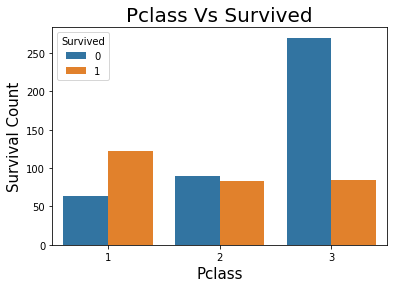

In [14]:
# Visualizing 'Survived' Vs 'Pclass'
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Pclass Vs Survived', fontsize=20)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

#### Observations:
1. We can clear see and understand that passengers of with `3rd class ticket had very low chance of surviving`.
2. Where, passengers of `1st class ticket had higher chances of surviving`.
3. Passenger with `2nd class ticket had mix match chances` of surviving and dying. 

### 2.1.2 Gender Vs Survived / Pclass

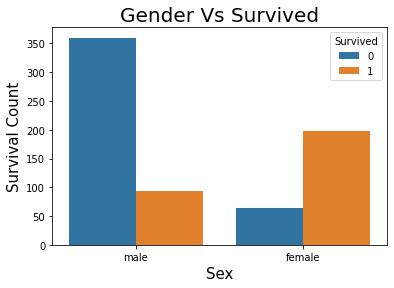

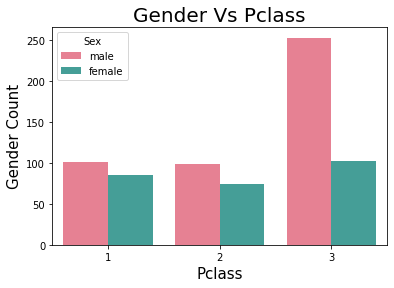

In [15]:
# Visualizing 'Survived' Vs 'Sex'
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('Gender Vs Survived', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

# Visualizing 'Pclass' Vs 'Gender'
sns.countplot(x='Pclass', data=df, hue='Sex', palette='husl')
plt.title('Gender Vs Pclass', fontsize=20)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Gender Count', fontsize=15)
plt.show()

#### Observations:
1. This visualization shows that more number of females were able to survive the accident.<br>
`Note: The reason behind this could be as number of life boats were less and therefore females were considered above males`
2. As we saw in `Pclass Vs Survived` visualization that passengers in 3rd class had lowest survival rate and above visualization of `Pclass Vs Sex` concludes that there were higher number of male passengers in 3rd class.<br>
`Hence there were more deaths than survival among among males in 'Gender Vs Survived' visualization` 

### 2.1.3.1 Age Vs Survived

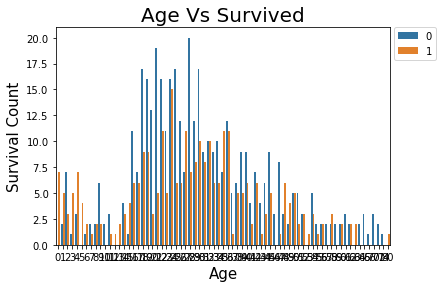

In [16]:
# Visualizing 'Survived' Vs 'Age'
sns.countplot(x='Age', data=df, hue='Survived')
plt.title('Age Vs Survived', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### To have a proper visualization of `Age` column we can create range of ages say 0-20, 21-40, 41-60, 61-80 and label them as 0,1,2,3.

In [17]:
# Create ordinal category for Age using binning method cut
cutLabels= [0,1,2,3]
cutBins = [0, 21, 41, 61, 80]
df['Age_Bins'] = pd.cut(df['Age'], bins=cutBins, labels=cutLabels)

df.Age_Bins.value_counts()

1    368
0    197
2    123
3     19
Name: Age_Bins, dtype: int64

#### Now we can remove `Age` Column and use `Age_Bin` for visualization and analysis 

In [18]:
# Drop 'Age' column
df.drop(['Age'], axis=1, inplace=True)

# moving target column to the last
df = df.reindex(columns = [col for col in df.columns if col != 'Survived'] + ['Survived'])

df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bins,Survived
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1,1
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,1,1
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S,1,0


#### We will need to change data type of new columns `Age_Bins` from **category to int**.

In [19]:
# change data type of Age_Bins using LabelEncoder
num = LabelEncoder()
df['Age_Bins'] = num.fit_transform(df['Age_Bins'].astype('str'))

df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 714 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  714 non-null    int64  

 1   Pclass       714 non-null    int64  

 2   Name         714 non-null    object 

 3   Sex          714 non-null    object 

 4   SibSp        714 non-null    int64  

 5   Parch        714 non-null    int64  

 6   Ticket       714 non-null    object 

 7   Fare         714 non-null    float64

 8   Cabin        714 non-null    object 

 9   Embarked     714 non-null    object 

 10  Age_Bins     714 non-null    int64  

 11  Survived     714 non-null    int64  

dtypes: float64(1), int64(6), object(5)

memory usage: 88.7+ KB


### 2.1.3.2 Age_Bins Vs Survived / Pclass / Gender

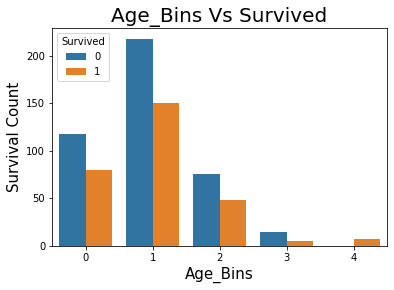

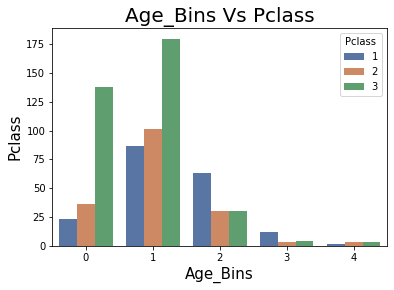

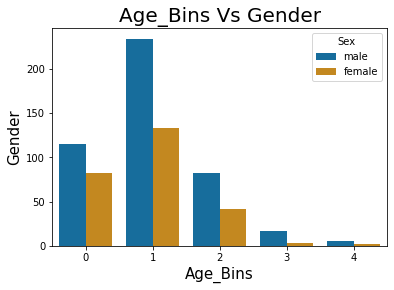

In [20]:
# Visualizing 'Survived' Vs 'Age_Bins'
sns.countplot(x='Age_Bins', data=df, hue='Survived')
plt.title('Age_Bins Vs Survived', fontsize=20)
plt.xlabel('Age_Bins', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

# Visualizing 'Pclass' Vs 'Age_Bins'
sns.countplot(x='Age_Bins', data=df, hue='Pclass', palette='deep')
plt.title('Age_Bins Vs Pclass', fontsize=20)
plt.xlabel('Age_Bins', fontsize=15)
plt.ylabel('Pclass', fontsize=15)
plt.show()

# Visualizing 'Gender' Vs 'Age_Bins'
sns.countplot(x='Age_Bins', data=df, hue='Sex', palette='colorblind')
plt.title('Age_Bins Vs Gender', fontsize=20)
plt.xlabel('Age_Bins', fontsize=15)
plt.ylabel('Gender', fontsize=15)
plt.show()

#### Observations:
`0-20 = 0, 21-40 = 1, 41-60 = 2, 61-80 = 3`
1. Passengers between age group of `21 to 40 had highest death counts`.
2. While, passenger between age group of `61-80 had lowest death counts`.
3. In above visualizations, last two visualizations prove that the reason behind high number of deaths will be counted for passengers of age group betweem 21 to 40 because<br>
  - Most of the passengers in that age group are from 3rd class and this class seems to have higher number of deaths as per visualization. *{Refer `Age_Bins Vs Gender` and `Pclass Vs Survived` visualization respectively}*
  - Most of the passengers are male in this age group and male will have higher number of deaths *{Refer Sex Vs Survived visualization}*

### 2.1.4 SibSp Vs Survived

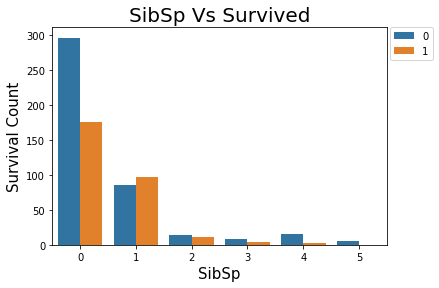

In [21]:
# Visualizing 'Survived' Vs 'SibSp'
sns.countplot(x='SibSp', data=df, hue='Survived')
plt.title('SibSp Vs Survived', fontsize=20)
plt.xlabel('SibSp', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### Observations:
1. Visualization shows that passengers with `0 or 2 or 3 or 4 or 5 siblings/spouses can have higher number of deaths(0) than survival (1)`.
2. While passengers with with `1 sibling/spouse have less death counts and more survival count`.
3. But passengers with `0 or 3 or 4 or 5 siblings/spouses are the ones with high death rates`.

### 2.1.5 Parch Vs Survived

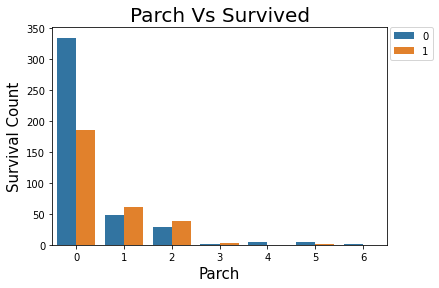

In [22]:
# Visualizing 'Survived' Vs 'Parch'
sns.countplot(x='Parch', data=df, hue='Survived')
plt.title('Parch Vs Survived', fontsize=20)
plt.xlabel('Parch', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### Observations:
1. Passengers with `0 or 4 or 5 or 6 Parents / Childrens seems to have higher deaths (0) than survival (1)`.
2. Passengers with `1 or 2 or 3 Parents/Childrens seems to have high surival chances than deaths`. 

### 2.1.6 Embarked Vs Survived

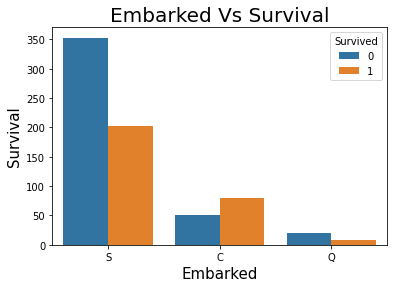

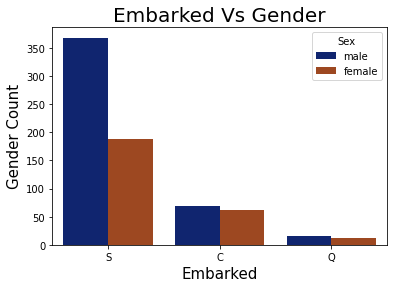

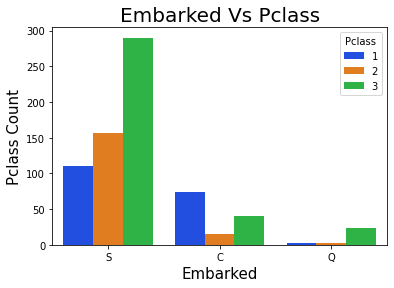

In [23]:
# Visualizing 'Survived' Vs 'Embarked'
sns.countplot(x='Embarked', data=df, hue='Survived')
plt.title('Embarked Vs Survival', fontsize=20)
plt.xlabel('Embarked', fontsize=15)
plt.ylabel('Survival', fontsize=15)
plt.show()

# Visualizing 'Gender' Vs 'Embarked'
sns.countplot(x='Embarked', data=df, hue='Sex', palette='dark')
plt.title('Embarked Vs Gender', fontsize=20)
plt.xlabel('Embarked', fontsize=15)
plt.ylabel('Gender Count', fontsize=15)
plt.show()

# Visualizing 'Pclass' Vs 'Embarked'
sns.countplot(x='Embarked', data=df, hue='Pclass', palette='bright')
plt.title('Embarked Vs Pclass', fontsize=20)
plt.xlabel('Embarked', fontsize=15)
plt.ylabel('Pclass Count', fontsize=15)
plt.show()

#### Observations:
1. Passengers embraked from Southampton and Queensland will have high death counts than survival.
2. While passengers embarked from Cherbourgh will have high survival chances.
3. Reason behind such difference could be seen in **Embarked Vs Gender** and **Embarked Vs Pclass** visualization that
  - Firstly, the number of male count is high among passengers embarking from Southampton and slightly high in Queensland. 
  - Secondly, passengers embarked from these two places have most passengers travelling in 3rd class.
  - We have seen that males have low survival chances and if they having 3rd class ticket than survival chances depletes drasctically.<br>
`Note: Above two reasons justify the higher rate of deaths in passengers embarked from Southampon and Queensland`.

# Step 3: Data Preparation

## 3.1 Important Feature Selection

In [24]:
# reading data into X as unlabelled data and y as Target data only
X = df.iloc[:,:-1]
# drop string features
X.drop(['Fare','Ticket','PassengerId','Cabin','Name'], axis=1, inplace=True)
# Convert male = 0 and female = 0 in column Sex
X['Sex'] = X['Sex'].map(dict(zip(['male','female'],[0,1])))
# Convert C=0, Q=1 and S=2 in Embarked column
X['Embarked'] = X['Embarked'].map(dict(zip(['C','Q','S'],[0,1,2])))

y = df.iloc[:,-1]

Sex         131.520858

Pclass       28.973197

Parch        10.479759

Embarked      8.741111

SibSp         0.362316

Age_Bins      0.153818

dtype: float64


<AxesSubplot:>

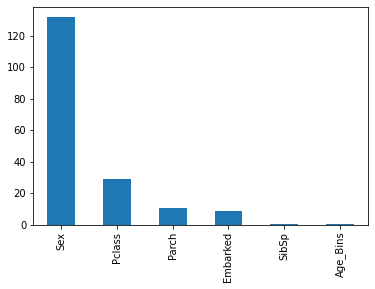

In [25]:
# importing 
from sklearn.feature_selection import SelectKBest, chi2

bestFeatures = SelectKBest(score_func=chi2, k='all')
fitFeatures = bestFeatures.fit(X,y)
Chi2Score = fitFeatures.scores_

# printing chi2 score beside each features
Chi2 = pd.Series(Chi2Score,index = X.columns)
Chi2.sort_values(ascending = False , inplace = True)
print(Chi2)

Chi2.plot.bar()

#### Observations:
1. The above results show the most important features would be `Sex`, `Pclass`, `Parch` and `Embarked` based on Chi2 Score and its visualization.
2. But as the count of the variables are low we won't drop any feature with low Chi2 Score for generating better result.

## 3.2 Dropping Irrelavant variables

#### `Fare`, `Ticket`, `PassengerId`, `Cabin` and `Name` columns make no impact and seems to be irrelevant for prediction. Hence, we can drop them.

In [26]:
# Drop Fare, Ticket, PassengerId, Cabin and Name columns
df.drop(['Fare','Ticket','PassengerId','Cabin','Name'], axis=1, inplace=True)

# conforming changes
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins,Survived
0,3,male,1,0,S,1,0
1,1,female,1,0,C,1,1
2,3,female,0,0,S,1,1
3,1,female,1,0,S,1,1
4,3,male,0,0,S,1,0


## 3.3 Convert Categorical variable to Ordinal variables

#### To bring more understanding let's convert columns like `Sex` and `Embarked` to ordinal category 0,1,2,etc.

In [27]:
# Convert male = 0 and female = 0 in column Sex
df['Sex'] = df['Sex'].map(dict(zip(['male','female'],[0,1])))

# Convert C=0, Q=1 and S=2 in Embarked column
df['Embarked'] = df['Embarked'].map(dict(zip(['C','Q','S'],[0,1,2])))

# conforming changes in data
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins,Survived
0,3,0,1,0,2,1,0
1,1,1,1,0,0,1,1
2,3,1,0,0,2,1,1
3,1,1,1,0,2,1,1
4,3,0,0,0,2,1,0


## 3.4 Visualize Correlation between all variables

In [28]:
# Summary
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins,Survived
0,3,0,1,0,2,1,0
1,1,1,1,0,0,1,1
2,3,1,0,0,2,1,1
3,1,1,1,0,2,1,1
4,3,0,0,0,2,1,0


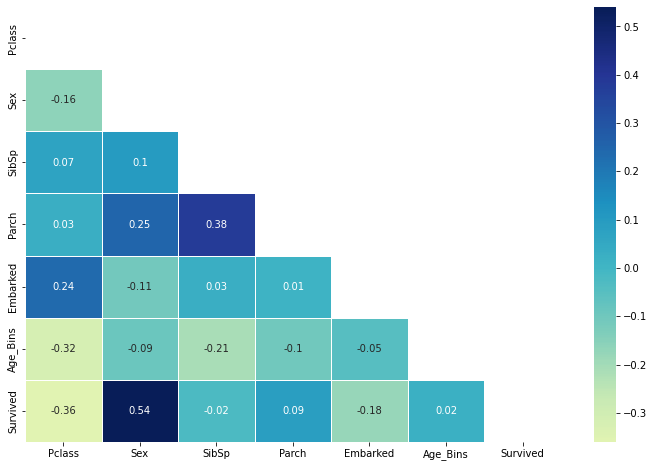

In [29]:
# Visualizing correlation of all variables with traget variable
plt.figure(figsize=(12,8))
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr.round(2), annot=True, cmap='YlGnBu', center=0, linewidth=.5, mask=matrix)
plt.show()

#### Observations:
1. `Sex` variables seems to be positively correlated with target variable `Survived` and seems to be highly correlated with target variable.
2. `Pclass` variables seems to be negatively correlated with target variable `Survived` and seems to be least correlated with target variable.
3. Remaining variables `Parch`,`SibSp`,`Age_Bins` and `Embarked` also seems to be correlated with good numbers. 

# Conclusion based on EDA

---
Following variables could be considered as importnat variables for model building and these variables are perfectlt correlated to target variable **Survived**. <br>
- Pcalss, 
- Sex, 
- SibSp, 
- Parch,
- Embarked,
- Age_Bins.
---